### Problem Statement

You are a data scientist / AI engineer working on a breast cancer recurrence prediction project. You have been provided with a dataset named **`"breast_cancer_data.csv"`**, which includes various clinical and pathological factors influencing the recurrence of breast cancer. The dataset comprises the following columns:

- `age:` Age of the patient (ranges: 30-39, 40-49, 50-59, 60-69).
- `menopause:` Menopause status of the patient (premeno, ge40, lt40).
- `tumor-size:` Size of the tumor (ranges in mm).
- `inv-nodes:` Number of involved lymph nodes (ranges).
- `node-caps:` Whether node caps are present (yes or no).
- `deg-malig:` Degree of malignancy (1, 2, 3).
- `breast:` Breast involved (left or right).
- `breast-quad:` Quadrant of the breast involved (left_up, left_low, right_up, right_low, central).
- `irradiat:` Whether the patient received irradiation (yes or no).
- `class:` Recurrence of breast cancer (no-recurrence-events, recurrence-events).

Your task is to analyze this dataset to understand the factors contributing to breast cancer recurrence. You will handle class imbalance using various techniques and build machine learning models to predict whether a patient will experience recurrence events based on the provided features.

In [14]:
# # Dataset Credits

# Zwitter,Matjaz and Soklic,Milan. (1988). Breast Cancer. 
# UCI Machine Learning Repository. https://doi.org/10.24432/C51P4M.

**Import Necessary Libraries**

In [4]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

### Task 1: Data Preparation and Exploration

1. Import the dataset and display the first few rows to understand its structure.
2. Check for any missing values in the dataset and handle them appropriately.
3. Visualize the class distribution to identify any class imbalance in the dataset.
4. Encoding categorical variables using one-hot encoding for the following columns: `age, menopause, tumor-size, inv-nodes, node-caps, breast, breast-quad, irradiat`.

In [8]:
# Step 1: Import the dataset and display the first few rows

# Step 1: Import the dataset and display the first few rows
df = pd.read_csv("breast_cancer_data.csv")

print("Number of rows and columns: ", df.shape)

print("First few rows of the dataset:")
df.sample(10)

Number of rows and columns:  (286, 10)
First few rows of the dataset:


age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
197  40-49   premeno     14-Oct       0-2        no          2   left   
62   50-59      ge40        0-4       0-2        no          1   left   
200  60-69      ge40      25-29       0-2        no          3  right   
146  60-69      ge40      50-54       0-2        no          2  right   
153  60-69      ge40      15-19       0-2        no          3  right   
64   40-49   premeno      25-29       0-2        no          1   left   
233  70-79      ge40      15-19    11-Sep       NaN          1   left   
21   60-69      ge40      15-19       0-2        no          2   left   
206  50-59      ge40      30-34       0-2        no          3   left   
31   50-59   premeno      15-19       0-2        no          2  right   

    breast-quad irradiat                 class  
197    left_low      yes  no-recurrence-events  
62     left_low       no  no-recurrence-events  
200    left_low       no  no-recurrence-events  
146     left_up      yes  no-recurrence-events  
153     left_up      yes  no-recurrence-events  
64    right_low       no  no-recurrence-events  
233    left_low      yes     recurrence-events  
21     left_low       no  no-recurrence-events  
206    right_up       no     recurrence-events  
31     left_low       no  no-recurrence-events

In [6]:
# Step 2: Check for any missing values in the dataset and handle them appropriately

df.isna().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    0
irradiat       0
class          0
dtype: int64

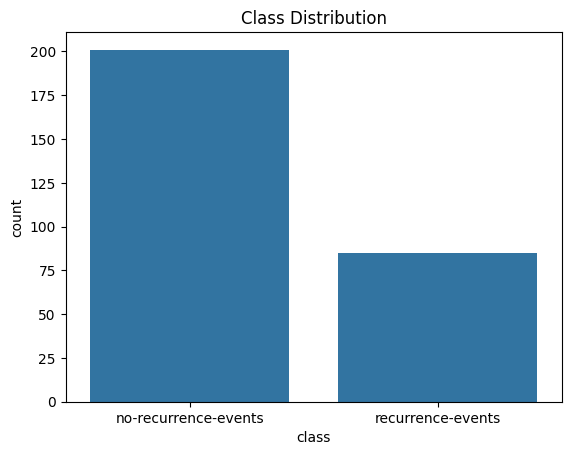

In [7]:
# Step 3: Visualize the class distribution to identify any class imbalance in the dataset
# Step 3: Visualize the class distribution to identify any class imbalance in the dataset
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()


In [9]:
# Step 4: Encoding categorical variables using one-hot encoding for the following columns:
# age, menopause, tumor-size, inv-nodes, node-caps, breast, breast-quad, irradiat.

df = pd.get_dummies(df, columns=['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat'], drop_first=True)
print("First few rows of the encoded dataset:")
df.head()

First few rows of the encoded dataset:


deg-malig                 class  age_30-39  age_40-49  age_50-59  \
0          3  no-recurrence-events       True      False      False   
1          2  no-recurrence-events      False       True      False   
2          2  no-recurrence-events      False       True      False   
3          2  no-recurrence-events      False      False      False   
4          2  no-recurrence-events      False       True      False   

   age_60-69  age_70-79  menopause_lt40  menopause_premeno  tumor-size_09-May  \
0      False      False           False               True              False   
1      False      False           False               True              False   
2      False      False           False               True              False   
3       True      False           False              False              False   
4      False      False           False               True              False   

   ...  inv-nodes_14-Dec  inv-nodes_15-17  inv-nodes_24-26  node-caps_yes  \
0  ...             False            False            False          False   
1  ...             False            False            False          False   
2  ...             False            False            False          False   
3  ...             False            False            False          False   
4  ...             False            False            False          False   

   breast_right  breast-quad_left_low  breast-quad_left_up  \
0         False                  True                False   
1          True                 False                False   
2         False                  True                False   
3          True                 False                 True   
4          True                 False                False   

   breast-quad_right_low  breast-quad_right_up  irradiat_yes  
0                  False                 False         False  
1                  False                  True         False  
2                  False                 False         False  
3                  False                 False         False  
4                   True                 False         False  

[5 rows x 32 columns]

### Task 2: Logistic Regression Model Without Handling Class Imbalance

1. Split the dataset into training and test sets.
2. Train a Logistic Regression model using the training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [10]:
# Step 1: Split the dataset into training and test sets
# Step 1: Split the dataset into training and test sets
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [11]:
# Step 2: Train a Logistic Regression model using the training data
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [12]:
# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report Without Handling Class Imbalance:")
print(report)

Classification Report Without Handling Class Imbalance:
                      precision    recall  f1-score   support

no-recurrence-events       0.75      0.88      0.81        41
   recurrence-events       0.50      0.29      0.37        17

            accuracy                           0.71        58
           macro avg       0.62      0.59      0.59        58
        weighted avg       0.68      0.71      0.68        58



### Task 3: Handling Class Imbalance Using Undersampling

1. Apply undersampling to balance the classes in the training data.
2. Train a Logistic Regression model using the undersampled training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [14]:
# Step 1: Apply undersampling to balance the classes in the training data
sample=RandomUnderSampler()
X_train_u, y_train_u=sample.fit_resample(X_train, y_train)

In [16]:
# Step 2: Train a Logistic Regression model using the undersampled training data

# Step 2: Train a Logistic Regression model using the undersampled training data
model_rus = LogisticRegression(max_iter=2000)
model_rus.fit(X_train_u, y_train_u)

LogisticRegression(max_iter=2000)

In [17]:
# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
y_pred_rus = model_rus.predict(X_test)
report_rus = classification_report(y_test, y_pred_rus)
print("Classification Report with Undersampling:")
print(report_rus)

Classification Report with Undersampling:
                      precision    recall  f1-score   support

no-recurrence-events       0.83      0.59      0.69        41
   recurrence-events       0.41      0.71      0.52        17

            accuracy                           0.62        58
           macro avg       0.62      0.65      0.60        58
        weighted avg       0.71      0.62      0.64        58



### Task 4: Handling Class Imbalance Using SMOTE (Oversampling)

1. Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in the training data.
2. Train a Logistic Regression model using the SMOTE-balanced training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [18]:
# Step 1: Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Step 2: Train a Logistic Regression model using the SMOTE-balanced training data
model_smote = LogisticRegression(max_iter=200)
model_smote.fit(X_train_smote, y_train_smote)


# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
y_pred_smote = model_smote.predict(X_test)
report_smote = classification_report(y_test, y_pred_smote)
print("Classification Report with SMOTE:")
print(report_smote)

Classification Report with SMOTE:
                      precision    recall  f1-score   support

no-recurrence-events       0.82      0.68      0.75        41
   recurrence-events       0.46      0.65      0.54        17

            accuracy                           0.67        58
           macro avg       0.64      0.66      0.64        58
        weighted avg       0.72      0.67      0.69        58



### Task 5: Handling Class Imbalance Using SMOTE Tomek Links

1. Apply SMOTE Tomek Links to balance the classes in the training data.
2. Train a Logistic Regression model using the SMOTE Tomek Links-balanced training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [19]:
# Step 1: Apply SMOTE Tomek Links to balance the classes in the training data
smt = SMOTETomek(random_state=42)
X_tomek, y_tomek = smt.fit_resample(X_train, y_train)

# Step 2: Train a Logistic Regression model using the SMOTE Tomek Links-balanced training data
model_tomek = LogisticRegression(max_iter=2000)
model_tomek.fit(X_tomek, y_tomek)

# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
y_pred_tomek = model_tomek.predict(X_test)
report_tomek = classification_report(y_test, y_pred_tomek)
print("Classification Report with SMOTE Tomek Links:")
print(report_tomek)

Classification Report with SMOTE Tomek Links:
                      precision    recall  f1-score   support

no-recurrence-events       0.85      0.68      0.76        41
   recurrence-events       0.48      0.71      0.57        17

            accuracy                           0.69        58
           macro avg       0.66      0.69      0.66        58
        weighted avg       0.74      0.69      0.70        58

